ECN 358 Machine Learning Project 
19116086
Vaishnavi Dayanand Andhalkar



In [1]:
#importing necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv, merge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Read in the focus/dose data with the first row (i.e., row 0) as the header
exp_data = read_csv('exposure_data.csv', header=0)

# Check for missing values
print("Total number of rows in DataFrame: " + str(exp_data.shape[0]))
print("Number of rows with missing values by column:")
print(exp_data.isnull().sum())


Total number of rows in DataFrame: 1050
Number of rows with missing values by column:
Fab           0
LithoCell     0
Stage         0
Wafer         0
FieldX        0
FieldY        0
Lot           0
Date          0
Time          0
Focus        25
ExpDose      25
dtype: int64


In [3]:
# drop rows with missing values, printing the row counts before and after
exp_data.dropna(inplace=True)
# Check for missing values
print("Total number of rows in DataFrame: " + str(exp_data.shape[0]))
print("Number of rows with missing values by column:")
print(exp_data.isnull().sum())


Total number of rows in DataFrame: 1000
Number of rows with missing values by column:
Fab          0
LithoCell    0
Stage        0
Wafer        0
FieldX       0
FieldY       0
Lot          0
Date         0
Time         0
Focus        0
ExpDose      0
dtype: int64


In [4]:
# Read in the inspection data
insp_data = read_csv('inspection_data.csv', header=0)

# Check for missing values
print("Total number of rows in dataframe: " + str(insp_data.shape[0]))
print("Number of rows with missing values by column:")
print(insp_data.isnull().sum())

Total number of rows in dataframe: 1025
Number of rows with missing values by column:
Lot          0
Wafer        0
FieldX       0
FieldY       0
InspTool     0
Defect      25
dtype: int64


In [5]:
# drop rows with missing values, printing the row counts before and after
insp_data.dropna(inplace=True)
# Check for missing values
print("Total number of rows in dataframe: " + str(insp_data.shape[0]))
print("Number of rows with missing values by column:")
print(insp_data.isnull().sum())


Total number of rows in dataframe: 1000
Number of rows with missing values by column:
Lot         0
Wafer       0
FieldX      0
FieldY      0
InspTool    0
Defect      0
dtype: int64


In [6]:
# merge data into a single DataFrame
merged_data = merge(exp_data, insp_data, how='inner', on=['Lot', 'Wafer', 'FieldX', 'FieldY'], sort=False)

# Print a few rows to see what the results look like
print(merged_data[0:5])

     Fab LithoCell  Stage  Wafer  FieldX  FieldY       Lot        Date  \
0  FAB_A    LITH15      2     17      -7      -3  6V78TJ10  05/21/2017   
1  FAB_A    LITH06      2      2      -4       6  3JZX3ZUK  11/27/2017   
2  FAB_A    LITH02      2     20       7      -6  SKFPM6YR  05/16/2017   
3  FAB_A    LITH14      2      4       7      -1  VINI5MWO  08/10/2017   
4  FAB_A    LITH15      2     11      -5      -3  7SCWPT3O  09/05/2017   

       Time      Focus    ExpDose InspTool  Defect  
0  09:00 AM -39.736527   9.967321  INSP14C     1.0  
1  07:40 PM -19.423390   9.466734  INSP14C     0.0  
2  03:29 PM  77.052599  10.212761  INSP08A     1.0  
3  12:14 PM  -3.179968   9.748477   INSP12     0.0  
4  05:53 AM -18.461324  10.645196   INSP11     0.0  


In [7]:
# we'll convert the pandas DataFrame into a numpy array:
data_array = merged_data.to_numpy()

# Print a few rows for comparison with the DataFrame view in the previous step
print(data_array[0:4,:])

[['FAB_A' 'LITH15' 2 17 -7 -3 '6V78TJ10' '05/21/2017' '09:00 AM'
  -39.73652744160897 9.967321151486813 'INSP14C' 1.0]
 ['FAB_A' 'LITH06' 2 2 -4 6 '3JZX3ZUK' '11/27/2017' '07:40 PM'
  -19.42339018173626 9.4667337843247 'INSP14C' 0.0]
 ['FAB_A' 'LITH02' 2 20 7 -6 'SKFPM6YR' '05/16/2017' '03:29 PM'
  77.05259896915155 10.212761264675525 'INSP08A' 1.0]
 ['FAB_A' 'LITH14' 2 4 7 -1 'VINI5MWO' '08/10/2017' '12:14 PM'
  -3.179968221567368 9.748476954975498 'INSP12' 0.0]]


In [8]:
# here we will convert large arrays into two small arrays.
X = data_array[:,9:11].astype(float)
Y = data_array[:,12].astype(int)

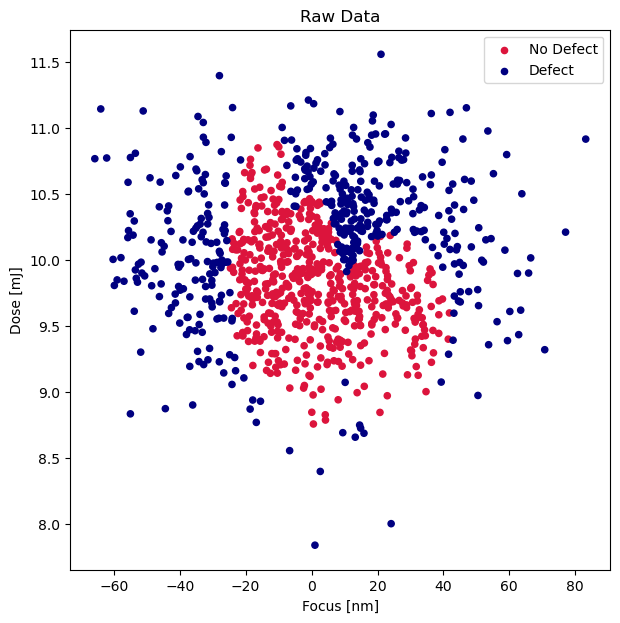

In [9]:
# We'll use a scatter plot with dose and focus as the two axis variables
# and use different colors for the two labels (defect/no defect).
mask = Y.astype(bool)
a = 20*np.ones(mask.shape)
a_good = np.ma.masked_where(mask, a)
a_bad = np.ma.masked_where(np.logical_not(mask), a)
fig = plt.figure(figsize=(6,6), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.scatter(X[:,0], X[:,1], s=a_good, color='crimson', label='No Defect')
axes.scatter(X[:,0], X[:,1], s=a_bad, color='navy', label='Defect')
axes.set_xlabel('Focus [nm]')
axes.set_ylabel('Dose [mJ]')
axes.set_title('Raw Data');
axes.legend();

In [10]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 2018)


In [11]:
# Create a 'StandardScaler' instance and adjust the normalization transforms to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the the training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define a Support vector classifier.
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'rbf',  gamma = 1, C=C )

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

SVC(gamma=1)

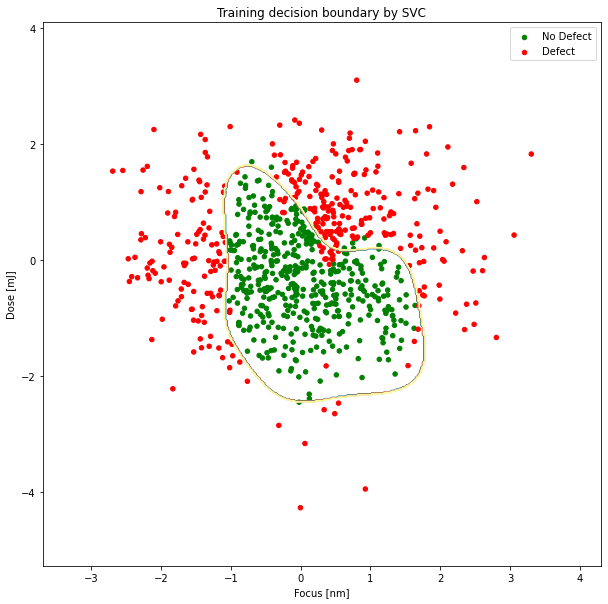

In [13]:
#now we will plot the boundary by SVC on a scatter plot.
h = .02  # step size in the mesh
# create a mesh to plot in
mask_train = Y_train.astype(bool)
a_train = 20*np.ones(mask_train.shape)
a_good_train = np.ma.masked_where(mask_train, a_train)
a_bad_train = np.ma.masked_where(np.logical_not(mask_train), a_train)
x_min_tr, x_max_tr = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_tr, y_max_tr = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx_tr, yy_tr = np.meshgrid(np.arange(x_min_tr, x_max_tr, h),
                     np.arange(y_min_tr, y_max_tr, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx_tr.ravel(), yy_tr.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx_tr.shape)
plt.rcParams['figure.figsize']=(10,10)
plt.scatter(X_train[:,0], X_train[:,1], s=a_good_train, color='green', label='No Defect')
plt.scatter(X_train[:,0], X_train[:,1], s=a_bad_train, color='red', label='Defect')
plt.contour(xx_tr, yy_tr, Z, cmap=plt.cm.Paired)
plt.xlabel('Focus [nm]')
plt.ylabel('Dose [mJ]')
plt.title('Training decision boundary by SVC');
plt.legend();

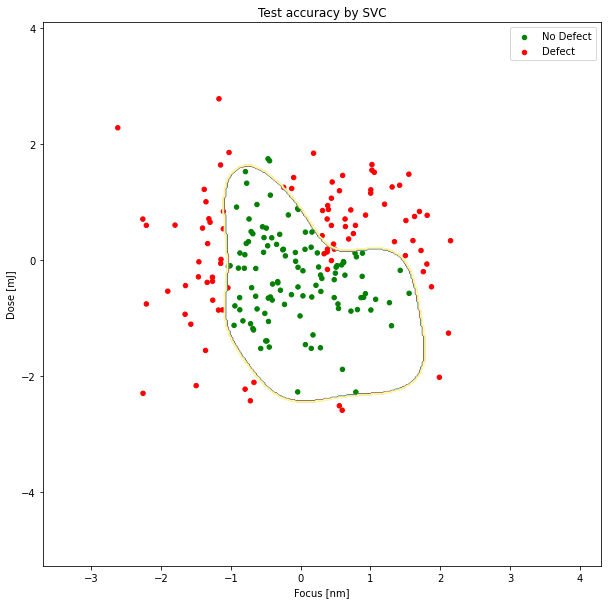

In [14]:
# now that our model is trained on the training data, we will test it
predictions = clf.predict(X_test)

mask_test = Y_test.astype(bool)
a_test = 20*np.ones(mask_test.shape)
a_good_test = np.ma.masked_where(mask_test, a_test)
a_bad_test = np.ma.masked_where(np.logical_not(mask_test), a_test)
x_min_test, x_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx_test, yy_test = np.meshgrid(np.arange(x_min_test, x_max_test, h),
                     np.arange(y_min_test, y_max_test, h))


plt.rcParams['figure.figsize']=(10,10)

plt.scatter(X_test[:,0], X_test[:,1], s=a_good_test, color='green', label='No Defect')
plt.scatter(X_test[:,0], X_test[:,1], s=a_bad_test, color='red', label='Defect')
plt.contour(xx_tr, yy_tr, Z, cmap=plt.cm.Paired)
plt.xlabel('Focus [nm]')
plt.ylabel('Dose [mJ]')
plt.title('Test accuracy by SVC');
plt.legend();

In [15]:
print(confusion_matrix(Y_test,predictions))

[[108   2]
 [  7  83]]


In [16]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       110
           1       0.98      0.92      0.95        90

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [17]:
from sklearn.ensemble import RandomForestClassifier 

C = 1.0  # SVM regularization parameter
clf = RandomForestClassifier(n_estimators = 230)

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

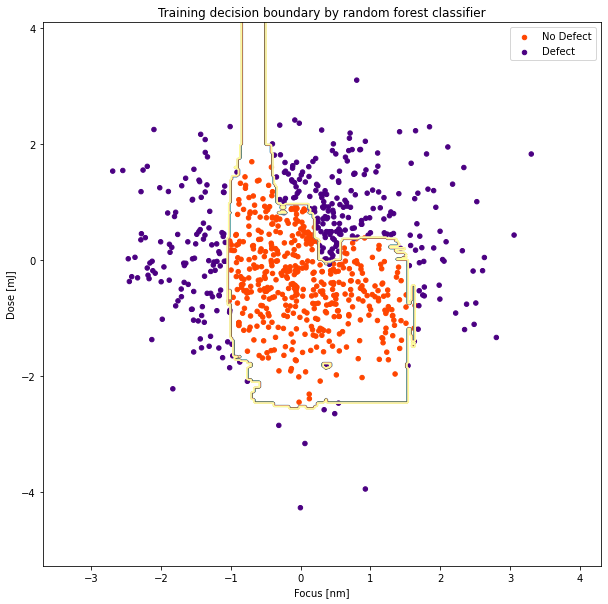

In [18]:
#now we will plot the boundary by SVC on a scatter plot.
h = .02  # step size in the mesh
# create a mesh to plot in
mask_train = Y_train.astype(bool)
a_train = 20*np.ones(mask_train.shape)
a_good_train = np.ma.masked_where(mask_train, a_train)
a_bad_train = np.ma.masked_where(np.logical_not(mask_train), a_train)
x_min_tr, x_max_tr = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_tr, y_max_tr = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx_tr, yy_tr = np.meshgrid(np.arange(x_min_tr, x_max_tr, h),
                     np.arange(y_min_tr, y_max_tr, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx_tr.ravel(), yy_tr.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx_tr.shape)
plt.rcParams['figure.figsize']=(10,10)
plt.scatter(X_train[:,0], X_train[:,1], s=a_good_train, color='orangered', label='No Defect')
plt.scatter(X_train[:,0], X_train[:,1], s=a_bad_train, color='indigo', label='Defect')
plt.contour(xx_tr, yy_tr, Z, cmap=plt.cm.Paired)
plt.xlabel('Focus [nm]')
plt.ylabel('Dose [mJ]')
plt.title('Training decision boundary by random forest classifier');
plt.legend();

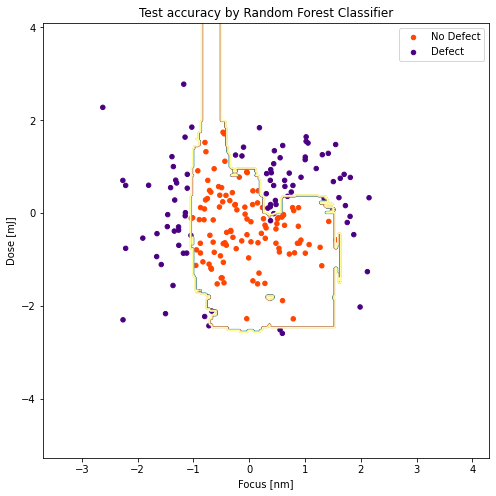

In [19]:
# now that our model is trained on the training data, we will test it
predictions = clf.predict(X_test)

mask_test = Y_test.astype(bool)
a_test = 20*np.ones(mask_test.shape)
a_good_test = np.ma.masked_where(mask_test, a_test)
a_bad_test = np.ma.masked_where(np.logical_not(mask_test), a_test)
x_min_test, x_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx_test, yy_test = np.meshgrid(np.arange(x_min_test, x_max_test, h),
                     np.arange(y_min_test, y_max_test, h))


plt.rcParams['figure.figsize']=(8,8)

plt.scatter(X_test[:,0], X_test[:,1], s=a_good_test, color='orangered', label='No Defect')
plt.scatter(X_test[:,0], X_test[:,1], s=a_bad_test, color='indigo', label='Defect')
plt.contour(xx_tr, yy_tr, Z, cmap=plt.cm.Paired)
plt.xlabel('Focus [nm]')
plt.ylabel('Dose [mJ]')
plt.title('Test accuracy by Random Forest Classifier');
plt.legend();

In [20]:
print(confusion_matrix(Y_test,predictions))

[[108   2]
 [  4  86]]


In [21]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       110
           1       0.98      0.96      0.97        90

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

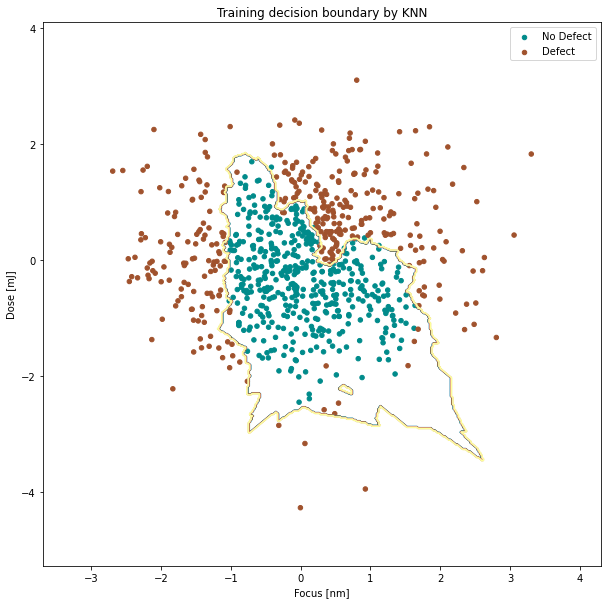

In [23]:
#now we will plot the boundary by SVC on a scatter plot.
h = .02  # step size in the mesh
# create a mesh to plot in
mask_train = Y_train.astype(bool)
a_train = 20*np.ones(mask_train.shape)
a_good_train = np.ma.masked_where(mask_train, a_train)
a_bad_train = np.ma.masked_where(np.logical_not(mask_train), a_train)
x_min_tr, x_max_tr = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_tr, y_max_tr = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx_tr, yy_tr = np.meshgrid(np.arange(x_min_tr, x_max_tr, h),
                     np.arange(y_min_tr, y_max_tr, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx_tr.ravel(), yy_tr.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx_tr.shape)
plt.rcParams['figure.figsize']=(10,10)
plt.scatter(X_train[:,0], X_train[:,1], s=a_good_train, color='darkcyan', label='No Defect')
plt.scatter(X_train[:,0], X_train[:,1], s=a_bad_train, color='sienna', label='Defect')
plt.contour(xx_tr, yy_tr, Z, cmap=plt.cm.Paired)
plt.xlabel('Focus [nm]')
plt.ylabel('Dose [mJ]')
plt.title('Training decision boundary by KNN');
plt.legend();

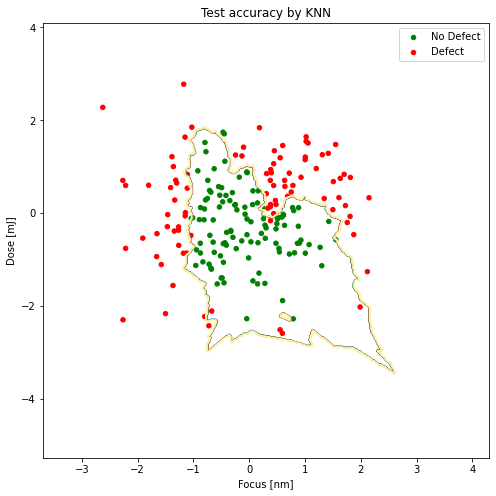

In [26]:
# now that our model is trained on the training data, we will test it
predictions = clf.predict(X_test)

mask_test = Y_test.astype(bool)
a_test = 20*np.ones(mask_test.shape)
a_good_test = np.ma.masked_where(mask_test, a_test)
a_bad_test = np.ma.masked_where(np.logical_not(mask_test), a_test)
x_min_test, x_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx_test, yy_test = np.meshgrid(np.arange(x_min_test, x_max_test, h),
                     np.arange(y_min_test, y_max_test, h))


plt.rcParams['figure.figsize']=(8,8)

plt.scatter(X_test[:,0], X_test[:,1], s=a_good_test, color='green', label='No Defect')
plt.scatter(X_test[:,0], X_test[:,1], s=a_bad_test, color='red', label='Defect')
plt.contour(xx_tr, yy_tr, Z, cmap=plt.cm.Paired)
plt.xlabel('Focus [nm]')
plt.ylabel('Dose [mJ]')
plt.title('Test accuracy by KNN');
plt.legend();

In [27]:
print(confusion_matrix(Y_test,predictions))

[[106   4]
 [  7  83]]


In [28]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       110
           1       0.95      0.92      0.94        90

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

